In [2]:
import datetime
import pandas as pd
import numpy as np
import datetime
import math
import re
import random
import matplotlib.pyplot as plt


In [65]:
class SPV(object):
    
    class format_SPV_data(object):
        
        '''For formatting our dataset.'''
        
        def __init__(self,df):
            
            '''Data should be entered in dataframe form with loan_date, expected_repayment_date, actual_repayment_date,
            plat_deal_rating, debtor_country_code, debtor_macrosector, EUR_loan, and EUR_repaid_amount as column headings.'''

            self.data = df
            new_cols = ['default_bool','repayment_from_expected_days','repaid_percent']

            for col_name in new_cols:
                self.data[col_name] = np.zeros([len(self.data),1])


        def implement_assumptions(self):
            '''Assumes that write off policy considers every deal with more than 90 days of delay as defaulted, 
            regardless of whether there is repayment in the dataset'''

            for num in range(len(self.data)) :
                self.data.loc[num,'repayment_from_expected_days'] = (datetime.datetime.strptime(self.data.loc
                    [num,'actual_repayment_date'],'%d/%m/%Y').date() - datetime.datetime.strptime(self.data.loc[num,\
                    'expected_repayment_date'],'%d/%m/%Y').date()).days

                if self.data.loc[num,'repayment_from_expected_days'] > 90:
                    self.data.loc[num,'default_bool'] = True    
                else:
                    self.data.loc[num,'default_bool'] = False

                self.data.loc[num,'repaid_percent'] = (self.data.loc[num,'EUR_repaid_amount'] - \
                    self.data.loc[num,'EUR_loan'])/self.data.loc[num,'EUR_loan']*100

            global SPV_data

            SPV_data = self.data


    class visualize_data(object):
        
        """For visualizing our portfolio data"""
        
        def __init__(self):
            
            self.data = SPV_data
        
        def try_col_match(self,col,val):
            
            '''Returns boolean value depending on if a value remains at an index pointer in a list.'''
            
            try:
                list(set(self.data[f'{col}'])).index(val)
                return(True)
            except Exception:
                return(False)
                
        def vis_hist(self,factors,bool_inst):
            
            '''Creates visualization of distributions of actual repayment days versus the expected
            repayment date and calls the pandas 'describe' method for a short table of descriptive
            statistics.
            
            factors -> list of strings which we can generate histograms based on certain values in the  
            plat_deal_rating, debtor_country_code, and debtor_macrosector columns. 
            
            If factors is equal to 'None', the entire dataset will be used to generate the distribution.
            
            bool_inst -> list(str1,str2...) list of boolean operators 'AND'/'OR'. '''
            
            if factors == None:
                title = 'All Types'
                temp_days_data = self.data['repayment_from_expected_days']
            else:
                title = '/'.join(factors)
            
                series = []

                for count,factor in enumerate(factors):
                    if self.try_col_match('plat_deal_rating',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['plat_deal_rating'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['plat_deal_rating'] == factor].index)))
                            else:
                                series += list(self.data[self.data['plat_deal_rating'] == factor].index)
                                
                    elif self.try_col_match('debtor_country_code',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['debtor_country_code'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['debtor_country_code'] == factor].index)))
                            else:
                                series += list(self.data[self.data['debtor_country_code'] == factor].index)
                                
                    elif self.try_col_match('debtor_macrosector',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['debtor_macrosector'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['debtor_macrosector'] == factor].index)))
                            else:
                                series += list(self.data[self.data['debtor_macrosector'] == factor].index)
                                
                series = list(set(series)) 
                
                temp_days_data = pd.Series(self.data['repayment_from_expected_days'],index = series)
            
            print(temp_days_data.describe())
            
            import matplotlib.pyplot as plt
            
            plt.hist(temp_days_data,bins = int(round(len(temp_days_data)/2)))
            
            if len(title) > 60:
                title = title[0:55] + '...'
            plt.title(title + ' ' + 'Distribution of Actual Payment Days from Expected Repayment')
            plt.xlabel('Days from Expected Repayment')
            plt.ylabel('Frequency')

            plt.show()
            
            self.vis_default_bool_bar(factors,bool_inst)
            
        def vis_default_bool_bar(self,factors,bool_inst):
            
            '''Visual display of bar graph of count of defaults dependent on the assumption that if the actual
            repayment is beyond 90 days of the expected repayment the loan is deemed to be in default'''
            
            if factors == None:
                title = 'All Types'
                temp_default_bool = self.data['default_bool']
            else:
                title = '/'.join(factors)
            
                series = []

                for count,factor in enumerate(factors):
                    if self.try_col_match('plat_deal_rating',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['plat_deal_rating'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['plat_deal_rating'] == factor].index)))
                            else:
                                series += list(self.data[self.data['plat_deal_rating'] == factor].index)
                                
                    elif self.try_col_match('debtor_country_code',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['debtor_country_code'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['debtor_country_code'] == factor].index)))
                            else:
                                series += list(self.data[self.data['debtor_country_code'] == factor].index)
                                
                    elif self.try_col_match('debtor_macrosector',factor) == True:
                        if count -1 < 0:
                            series += list(self.data[self.data['debtor_macrosector'] == factor].index)
                        else:
                            if bool_inst[count-1] == 'AND':
                                series = list(set(series).intersection(list(
                                    self.data[self.data['debtor_macrosector'] == factor].index)))
                            else:
                                series += list(self.data[self.data['debtor_macrosector'] == factor].index)
                                
                series = list(set(series))

                temp_default_bool = pd.Series(self.data['default_bool'],index = series)
            
            print(f'Default-to-Total: {list(temp_default_bool).count(True)/len(list(temp_default_bool))}')
            temp_default_bool.value_counts().plot(kind='bar')
            
    class ML_approach(object):
        
        '''For implementing ensemble learning techniques to predict defaults.'''
        
        def __init__(self):
            
            self.data = SPV_data
        
        def reverse_dic(self,dic):
            
            dic = {y:x for x,y in dic.items()}
            return(dic)
            
        def make_ml_df(self):
            
            '''Generate and format a dataframe object with tractable integer formatted data to implement ensemble 
            learning techniques to predict defaults'''
            
            self.rating_dic = self.reverse_dic(dict(enumerate(sorted(list(set(self.data['plat_deal_rating']))))))
            self.country_code_dic = self.reverse_dic(dict(enumerate(list(set(self.data['debtor_country_code'])))))
            self.macrosector_dic = self.reverse_dic(dict(enumerate(list(set(self.data['debtor_macrosector'])))))
            self.default_bool_dic = self.reverse_dic(dict(enumerate(list(set(self.data['default_bool'])))))
            
            for num in range(len(self.data)):
                self.data.loc[num,'plat_deal_rating'] = self.rating_dic[self.data.loc[num,'plat_deal_rating']]
                self.data.loc[num,'debtor_country_code'] = self.country_code_dic[self.data.loc[num,'debtor_country_code']]
                self.data.loc[num,'debtor_macrosector'] = self.macrosector_dic[self.data.loc[num,'debtor_macrosector']]
                self.data.loc[num,'default_bool'] = self.default_bool_dic[self.data.loc[num,'default_bool']]
        
        def get_entropy(self):
            
            '''Returns base entropy of data as a floating point value'''
            
            entropy = 0
            for n in list(set(self.data['default_bool'])):
                prob = len(self.data[self.data['default_bool'] == n].index)/len(self.data)
                entropy += (prob*np.log2(prob))
            
            return(-entropy)
        
        def run_decision_tree(self,test_size, shuffle, visualize):
            
            '''Generates a single decision tree and prints comparative accuracy of test with all relevant features
            from data set. Namely, plat_deal_rating, debtor_country_code, debtor_macrosector, and repaid_percent.
            
            test_size -> int
            
            shuffle -> boolean 
            
            visualize requires a boolean input to generate a graphic output of the decision tree from the kernel.
            
            '''
            
            from sklearn import tree
            from sklearn.model_selection import train_test_split 

            ml_temp_data = self.data

            X = np.array([[ml_temp_data['plat_deal_rating'][num],ml_temp_data['debtor_country_code'][num],
                           ml_temp_data['debtor_macrosector'][num],ml_temp_data['repaid_percent'][num]]\
                          for num in range(len(ml.data))])

            y = np.array(ml_temp_data['default_bool'])

            X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = shuffle,test_size = test_size) 


            dec_tree = tree.DecisionTreeClassifier(max_depth = 4,criterion = 'entropy',\
                                                   splitter = 'best').fit(X_train,y_train) 

            dec_tree_predictions = dec_tree.predict(X_test) 
            
            print(f'Train Proportion of actual defaults to total: {list(y_train).count(1)/len(y_train)}')

            print(f'Test Proportion of actual defaults to total: {list(y_test).count(1)/len(y_test)}')

            print(f'Proportion of default predictions to total predictions: {list(dec_tree_predictions).count(1)/len(list(dec_tree_predictions))}')

            count = 0
            default_count = 0
            for num in range(len(dec_tree_predictions)):
                if dec_tree_predictions[num] == y_test[num]:
                    count += 1
                if dec_tree_predictions[num] == 1 and dec_tree_predictions[num] == y_test[num]:
                    default_count += 1
                    
            print(f'Accuracy: {count/len(dec_tree_predictions)}')
            print(f'Accuracy: {default_count/default_count/list(y_test).count(1)}')

            if visualize == False:
                pass
            else:
                fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

                tree.plot_tree(dec_tree,
                           feature_names = ['plat_deal_rating','debtor_country_code','debtor_macrosector','repaid_percent'], 
                           class_names= ['0','1'],
                           filled = True,
                           proportion = False,
                           precision = 10);
        
        def run_decision_tree_combinations(self,test_size, shuffle, features, max_depth, visualize):
            
            '''Generates all unique combinations of a list of values and runs decision trees on all different 
            combinations of features with specified max_depth ranges. Returns a dictionary with all the test
            outputs from the varying feature combinations and max depth ranges. Prints comparative accuracy.
            
            test_size -> int
            
            shuffle -> boolean 
            
            features -> list of features to generate all possible combinations to run.
            
            max_depth -> tuple specifying max_depth range to be iterated on.
            
            visualize requires a boolean input to generate a graphic output of the decision tree from the kernel
            and to save .png files specifying the combinations of features with specific max depth.
            
            '''
            from sklearn import tree
            from sklearn.model_selection import train_test_split 
            from graphviz import Source
            
            features = ['plat_deal_rating','debtor_country_code','debtor_macrosector','repaid_percent']

            from itertools import chain, combinations

            feature_comb = []

            for num in range(1,len(features)+1):
                feature_comb.append([val for val in combinations(features,num)])

            feature_comb = [list(num) for val in feature_comb for num in val]

            ml_temp_data = ml.data
            
            dec_tree_dic = {}
            
            
            for features in feature_comb:
                for depth in range(max_depth[0],max_depth[1]+1):
                    X = []
                    for num in range(len(ml_temp_data)):
                        X.append(list(ml_temp_data.loc[num,features]))

                    y = np.array(ml_temp_data['default_bool'])

                    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = shuffle,test_size = test_size) 


                    dec_tree = tree.DecisionTreeClassifier(max_depth = depth,criterion = 'entropy',\
                                                           splitter = 'best').fit(X_train,y_train) 

                    dec_tree_predictions = dec_tree.predict(X_test) 

                    print(features)

                    print(f'Train Proportion of actual defaults to total: {list(y_train).count(1)/len(y_train)}')
                    print(f'Test Proportion of actual defaults to total: {list(y_test).count(1)/len(y_test)}')

                    print(f'Proportion of default predictions to total predictions: {list(dec_tree_predictions).count(1)/len(list(dec_tree_predictions))}')

                    count = 0
                    default_count = 0
                    for num in range(len(dec_tree_predictions)):
                        if dec_tree_predictions[num] == y_test[num]:
                            count += 1
                        if dec_tree_predictions[num] == 1 and dec_tree_predictions[num] == y_test[num]:
                            default_count += 1
                    
                    total_accuracy = count/len(dec_tree_predictions)
                    default_accuracy = default_count/list(y_test).count(1)
                    print(f'Total Accuracy: {total_accuracy}')
                    print(f'Default Accuracy: {default_accuracy}')
                    
                    if visualize == False:
                        pass
                    else:
                        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

                        graph = Source( tree.export_graphviz(dec_tree, out_file=None, feature_names = features, 
                                                            class_names = ['0','1']))
                        graph.format = 'png'
                        graph.render("dec_tree_" + ','.join(features) + f" _depth_{depth}",view=True)

                    dec_tree_dic[','.join(features) + f"_depth_{depth}"] = {'Accuracy': total_accuracy,\
                        'Default Accuracy': default_accuracy}
            
            global dec_tree_dic_global
            
            dec_tree_dic_global = dec_tree_dic
            
            return(dec_tree_dic)

In [ ]:
SPV_data = pd.read_csv(r'C:\Users\Boris\Desktop\Jupyter Notebooks\Fasanara Capital Assessment\interview_test_data.csv')


test = SPV.format_SPV_data(SPV_data)
test.implement_assumptions()
visual = SPV.visualize_data()

count    3337.000000
mean       10.530117
std        87.505737
min      -293.000000
25%        -4.000000
50%         1.000000
75%        33.000000
max       354.000000
Name: repayment_from_expected_days, dtype: float64


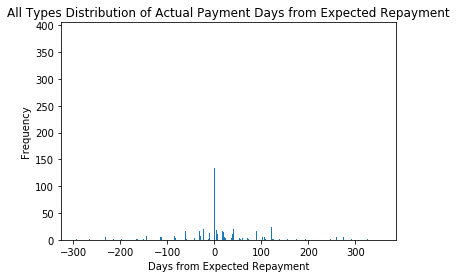

Default-to-Total: 0.11866946359005094


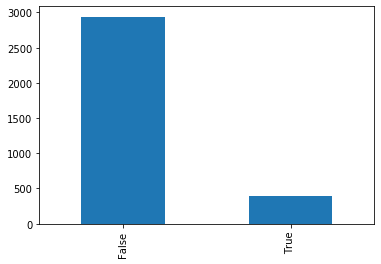

In [68]:
visual.vis_hist(None,None)

count    129.000000
mean      64.689922
std      106.791034
min     -273.000000
25%        0.000000
50%       46.000000
75%      107.000000
max      354.000000
Name: repayment_from_expected_days, dtype: float64


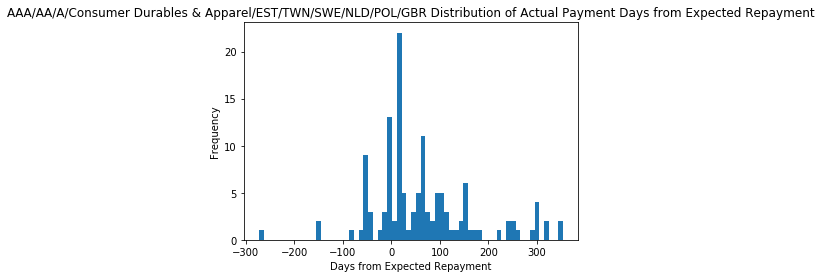

Default-to-Total: 0.31007751937984496


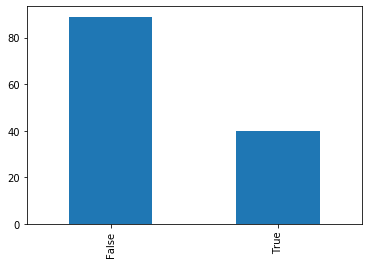

In [69]:
visual.vis_hist(['AAA','AA','A','Consumer Durables & Apparel','EST','TWN','SWE','NLD','POL','GBR'],\
                ['OR','OR','AND','AND','OR','OR','OR','OR','OR'])

count    242.000000
mean      20.847107
std       98.855092
min     -284.000000
25%        0.000000
50%       16.000000
75%       66.750000
max      354.000000
Name: repayment_from_expected_days, dtype: float64


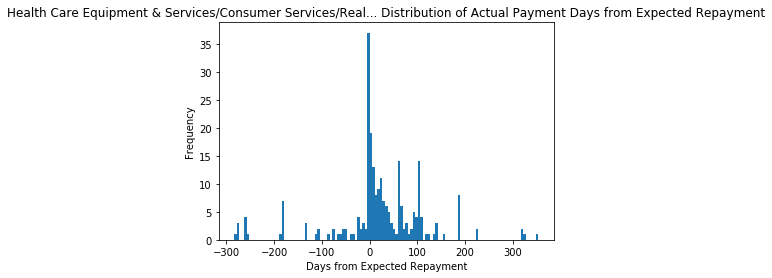

Default-to-Total: 0.19834710743801653


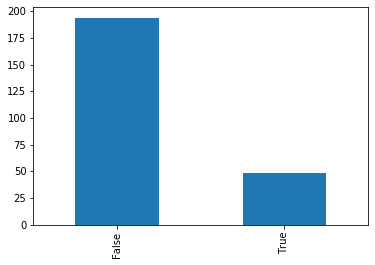

In [66]:
bool_inst_part = []
for n in range(0,25):
    if n == 0:
        bool_inst_part.append('AND')
    elif n == 10:
        bool_inst_part.append('AND')
    else:
        bool_inst_part.append('OR')
        
visual.vis_hist(['Health Care Equipment & Services',
'Consumer Services',
'Real Estate',
'Software & Services',
'Technology Hardware & Equipment',
'Automobiles & Components',
'Food & Staples Retailing',
'Diversified Financials',
'Materials',
'Transportation',
'Commercial & Professional Services',
'Retailing',
'DEU',
'FRA',
'ROU',
'HUN',
'ESP',
'JPN',
'PRT',
'CHE',
'BRA',
'ARE',
'IRL',
'HKG',
'RUS'
],\
bool_inst_part)

In [71]:
ml = SPV.ML_approach()
ml.make_ml_df()
ml.run_decision_tree_combinations(.3,False,['plat_deal_rating','debtor_country_code','debtor_macrosector','repaid_percent']
                                 ,(3,5),False)

['plat_deal_rating']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0
['plat_deal_rating']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0
['plat_deal_rating']
Train Proportion of actual defaults to total: 0.11563169164882227
Test Proportion of actual defaults to total: 0.12574850299401197
Proportion of default predictions to total predictions: 0.0
Total Accuracy: 0.874251497005988
Default Accuracy: 0.0


KeyboardInterrupt: 

In [42]:
#Saves dictionary to text file in directory 
def save_dict_to_file(dic):
    f = open('dec_tree_ouput.txt','w')
    f.write(str(dic))
    f.close()

save_dict_to_file(dec_tree_dic_global)

dec_tree_dic_global

{'plat_deal_rating _depth_3': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'plat_deal_rating _depth_4': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'plat_deal_rating _depth_5': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_country_code _depth_3': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_country_code _depth_4': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_country_code _depth_5': {'Accuracy': 0.8792415169660679,
  'Default Accuracy': 0.05555555555555555},
 'debtor_macrosector _depth_3': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_macrosector _depth_4': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'debtor_macrosector _depth_5': {'Accuracy': 0.874251497005988,
  'Default Accuracy': 0.0},
 'repaid_percent _depth_3': {'Accuracy': 0.8652694610778443,
  'Default Accuracy': 0.007936507936507936},
 'repaid_percent _depth_4': {'Accuracy': 0.865269461